In [62]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Getting the data

In [63]:
response = requests.get("https://uadata.net/work-positions/cities.json?o=Київ")
data_json = response.json()

Creating the dataframe

In [64]:
df = pd.DataFrame(data_json["data"])

In [65]:
df.head()

,at,val
0,2022-05-23,4831
1,2022-05-24,5118
2,2022-05-25,5025
3,2022-05-26,5134
4,2022-05-27,5233


In [66]:
df.shape

(387, 2)

In [67]:
df.columns

Index(['at', 'val'], dtype='object')

In [68]:
df.dtypes

at     object
val     int64
dtype: object

Preparing the data

In [69]:
df["at"] = pd.to_datetime(df["at"])

In [70]:
df = df.rename(columns= {"at": "Date", "val": "Vacancies"})
df.set_index("Date", inplace=True)

In [71]:
df.head()

,Vacancies
Date,
2022-05-23,4831
2022-05-24,5118
2022-05-25,5025
2022-05-26,5134
2022-05-27,5233


Graphs building

In [72]:
df["Vacancies"] = df['Vacancies'].replace(0, np.nan)
df["Vacancies"] = df['Vacancies'].interpolate()

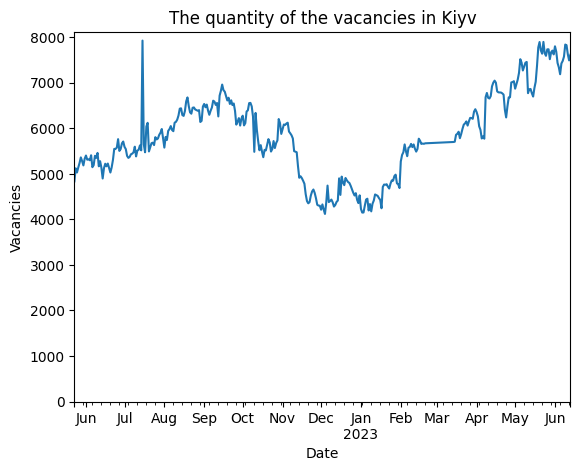

In [73]:
df["Vacancies"].plot()
plt.title("The quantity of the vacancies in Kiyv")
plt.xlabel("Date")
plt.ylabel("Vacancies")
plt.ylim(bottom=0)
plt.show()

In [74]:
df["rolling_mean"] = df['Vacancies'].rolling(window=7).mean()

In [75]:
df

,Vacancies,rolling_mean
Date,,
2022-05-23,4831.0,NaN
2022-05-24,5118.0,NaN
2022-05-25,5025.0,NaN
2022-05-26,5134.0,NaN
2022-05-27,5233.0,NaN
...,...,...
2023-06-09,7833.0,7462.285714
2023-06-10,7818.0,7517.857143
2023-06-11,7618.0,7558.571429


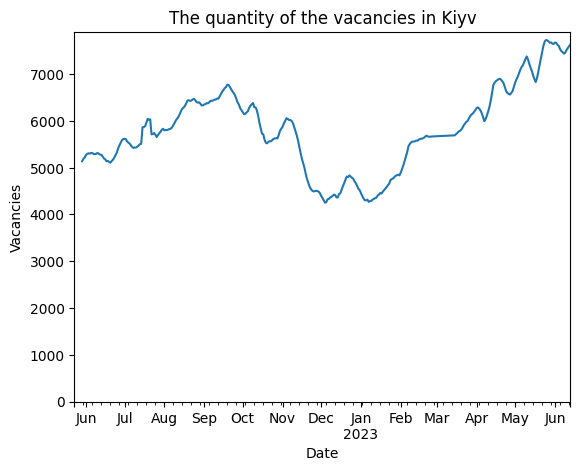

In [77]:
df["rolling_mean"].plot()
plt.title("The quantity of the vacancies in Kiyv")
plt.xlabel("Date")
plt.ylabel("Vacancies")
plt.ylim(bottom=0)
plt.show()